In [55]:
include("NNSFE.jl")

gaussian_potential (generic function with 1 method)

In [18]:
psi0 = exp.(-x_grid.^2 + 1im .*x_grid);  # Initial wave function

psi = psi0 # Time evolution loop
alpha, g, s, V = 2, 1, 1, 1;  # Fractional order, nonlinearity, saturation, and potential

psi_evo = zeros(ComplexF64, N, M) # Initialize wave function evolution array
for t in 1:M
    psi = time_evolution(psi, alpha, dt, k, g, s, V)
    psi_evo[:, t] = psi
end

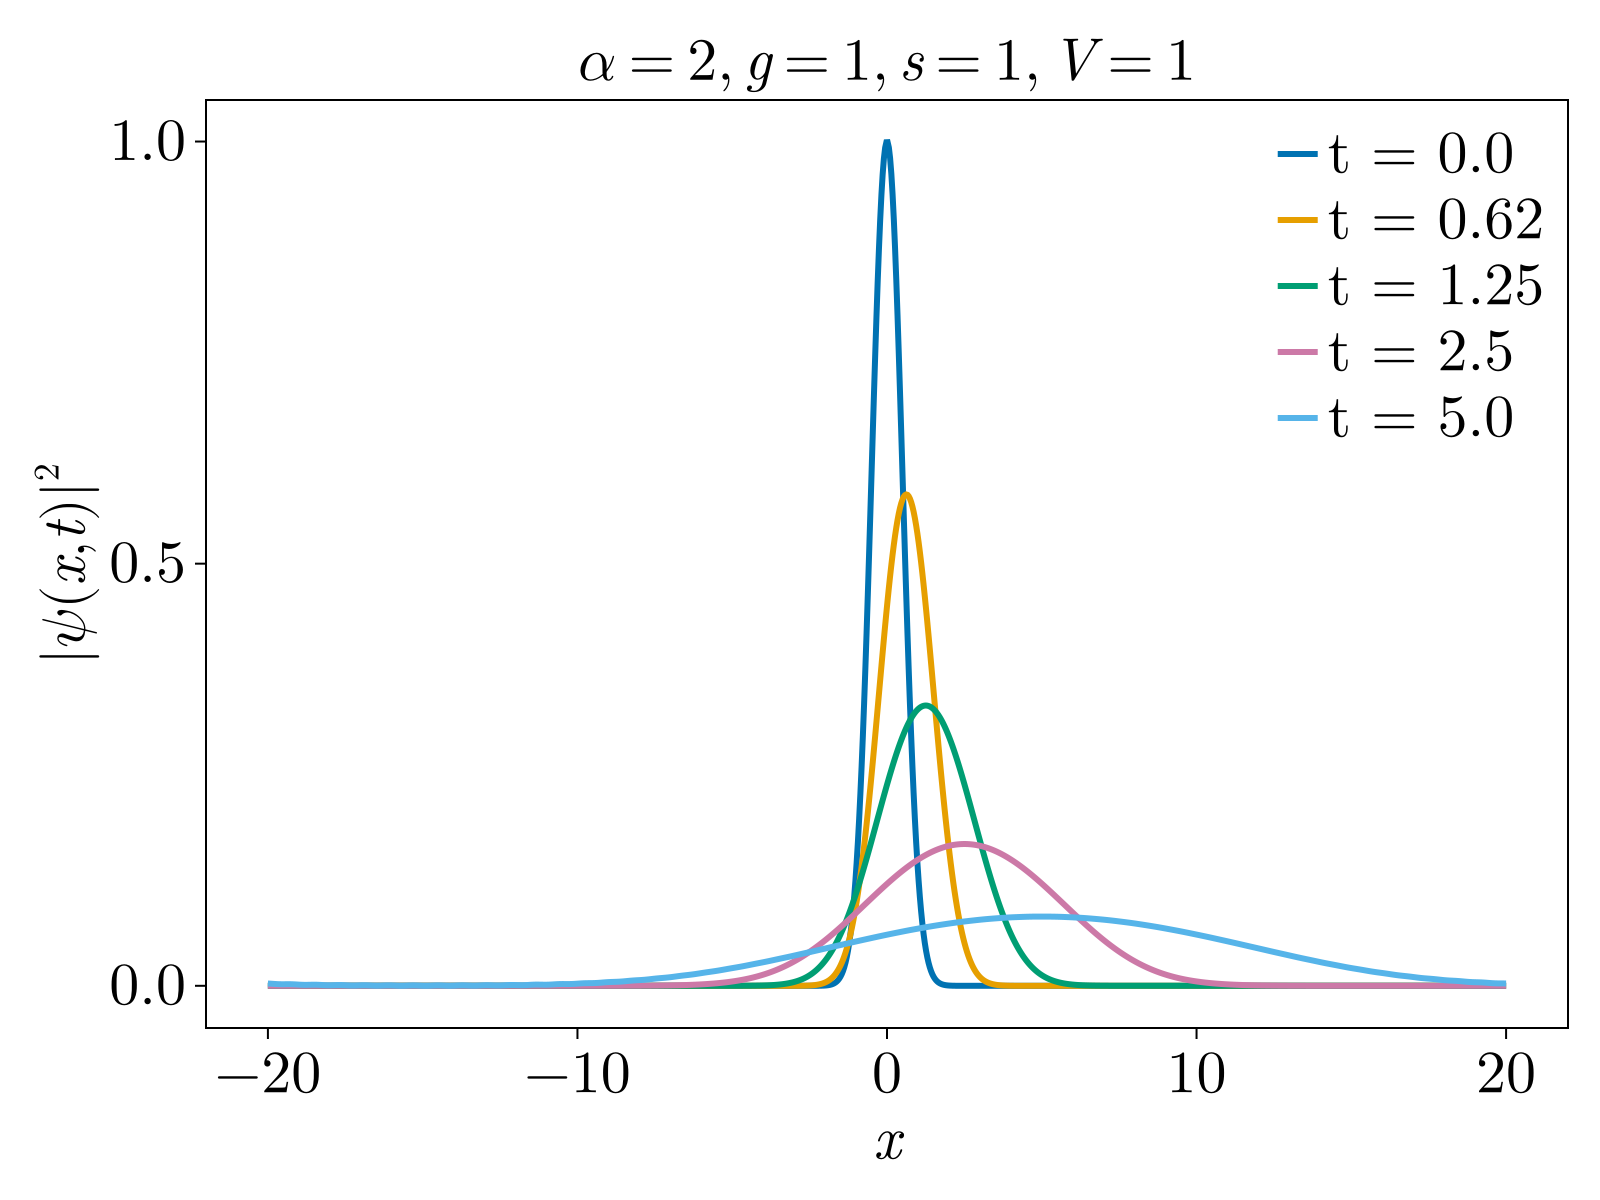

In [21]:
# Calculate |psi|^2
psi_final = real(psi_evo .* conj(psi_evo))

# Select time steps to plot
time_steps_to_plot = [1, Int(M//8), Int(M//4), Int(M//2), M]

# Plot results
# Set global theme
set_theme!(theme_latexfonts(), size = (800, 600))

fig = Figure(fontsize = 30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", xgridvisible = false, ygridvisible = false,
title = L"\alpha = 2,\, g = 1,\, s = 1,\, V = 1")
for t in time_steps_to_plot
    lines!(ax, x_grid, psi_final[:, t], label="t = $(round(tfinal * t / M, digits=2))", alpha=1, linewidth=3)
end

axislegend(ax, framevisible = false)
save("./figs/nlse_evolution_00.pdf", fig)
fig  # Display the plot

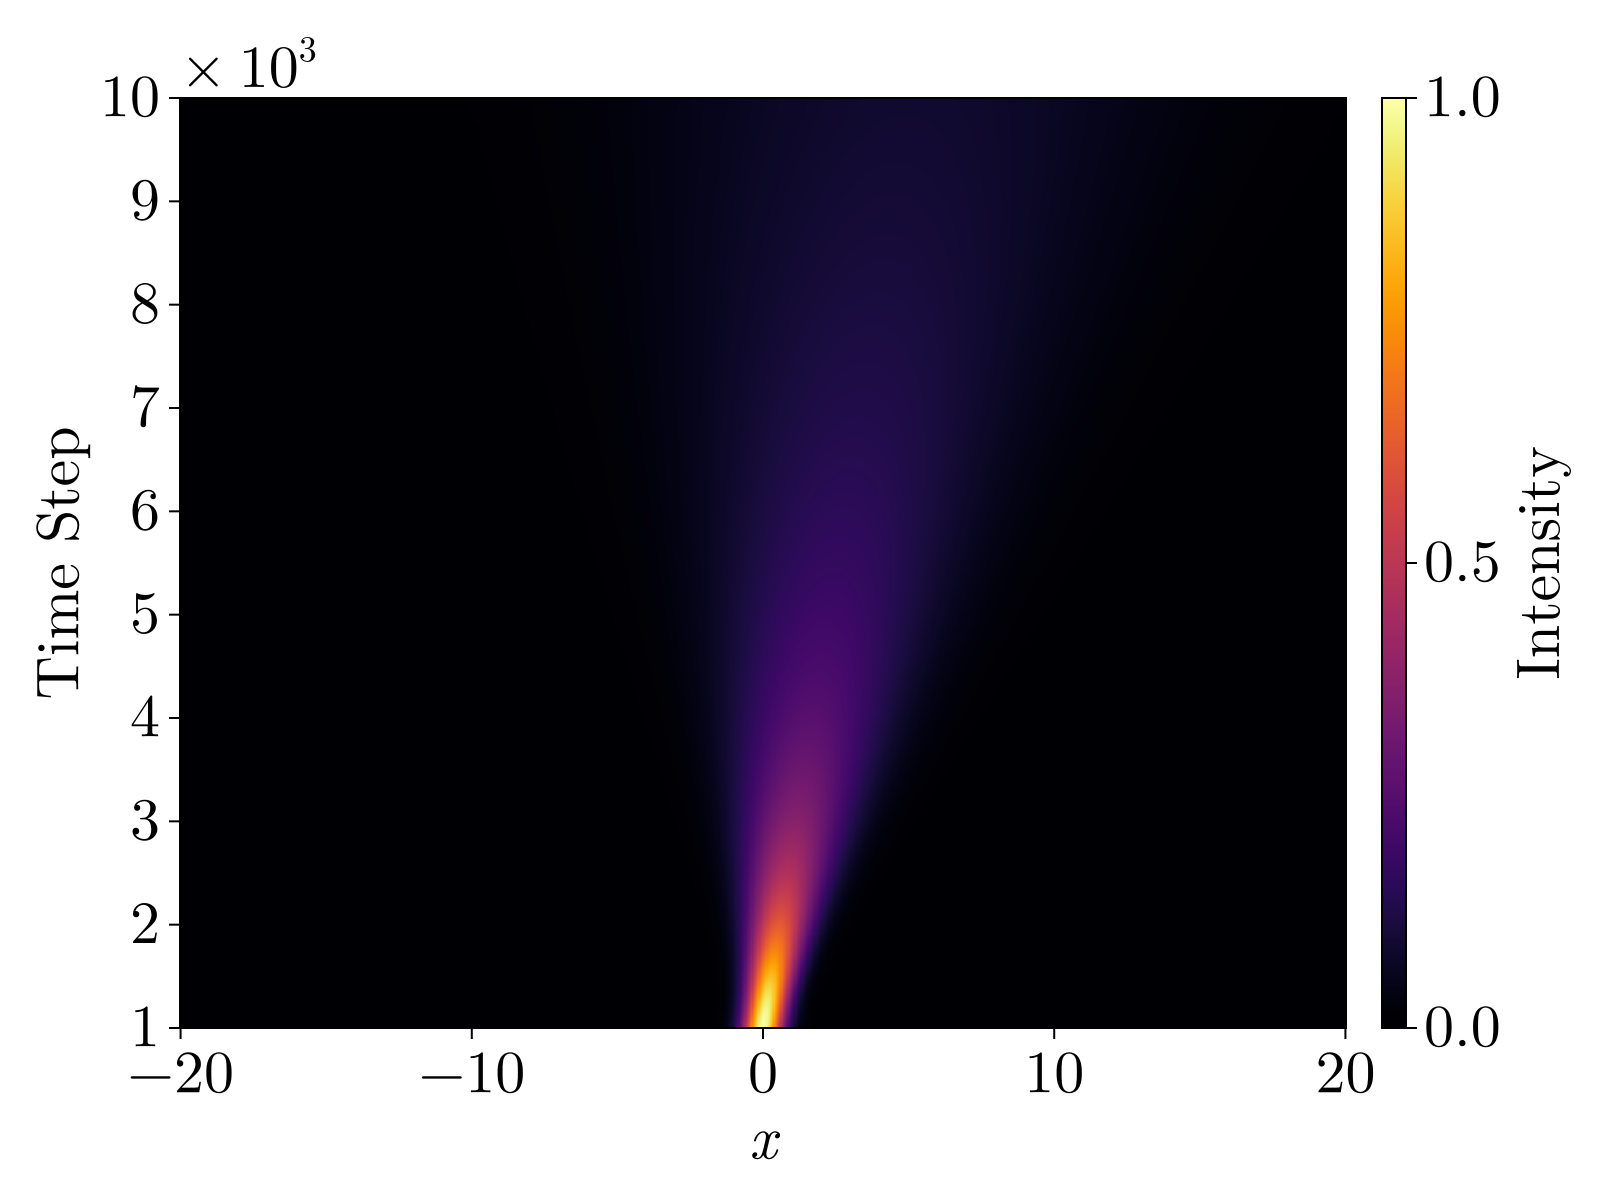

In [20]:
# Plot heatmap of the evolution of |psi|^2 over space and time
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"$x$", ylabel = "Time Step")
y_scaled = 1:M/1000
heatmap!(ax, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
# Add colorbar
Colorbar(fig[1, 2], colormap = :inferno, label = "Intensity")
save("./figs/nlse_heatmap_00.pdf", fig)
fig  # Display the heatmap plot

### Step Potential

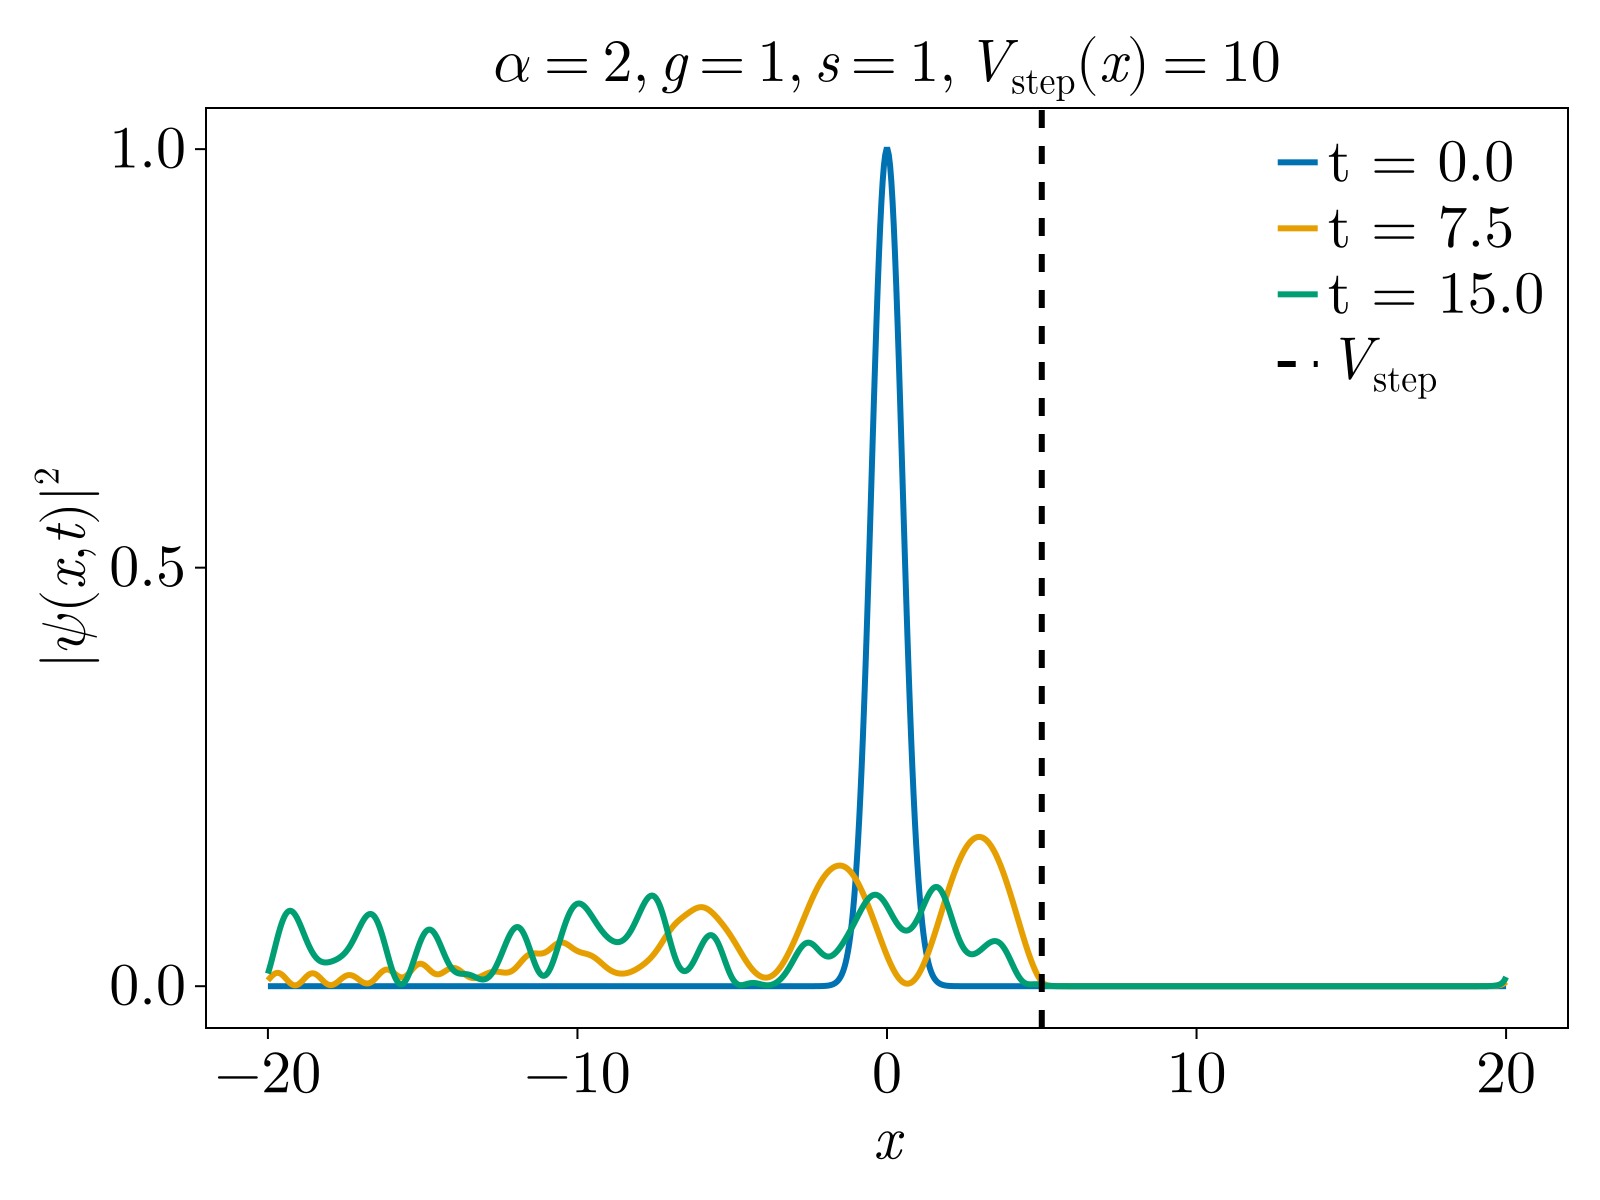

In [58]:
psi0 = exp.(-x_grid.^2);  # Initial wave function

x0 = 5 # starting of the step
V0 = 10 # height of the step

V_step = step_potential(x_grid, x0, V0)

psi = psi0 # Time evolution loop
alpha, g, s, V = 2, 1, 1, V_step;  # Fractional order, nonlinearity, saturation, and potential

psi_evo = zeros(ComplexF64, N, M) # Initialize wave function evolution array
for t in 1:M
    psi = time_evolution(psi, alpha, dt, k, g, s, V)
    psi_evo[:, t] = psi
end

# Calculate |psi|^2
psi_final = real(psi_evo .* conj(psi_evo))

# Select time steps to plot
time_steps_to_plot = [1, Int(M//2), M]

# Plot results
# Set global theme
set_theme!(theme_latexfonts(), size = (800, 600))

fig = Figure(fontsize = 30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", xgridvisible = false, ygridvisible = false,
title = L"\alpha = 2,\, g = 1,\, s = 1,\, V_{\text{step}}(x) = 10")
for t in time_steps_to_plot
    lines!(ax, x_grid, psi_final[:, t], label="t = $(round(tfinal * t / M, digits=2))", alpha=1, linewidth=3)
end
vlines!(ax, [x0], color = :black, linestyle = :dash, linewidth = 3, label = L"V_{\text{step}}")

axislegend(ax, framevisible = false)
save("./figs/nlse_evolution_step.pdf", fig)
fig  # Display the plot

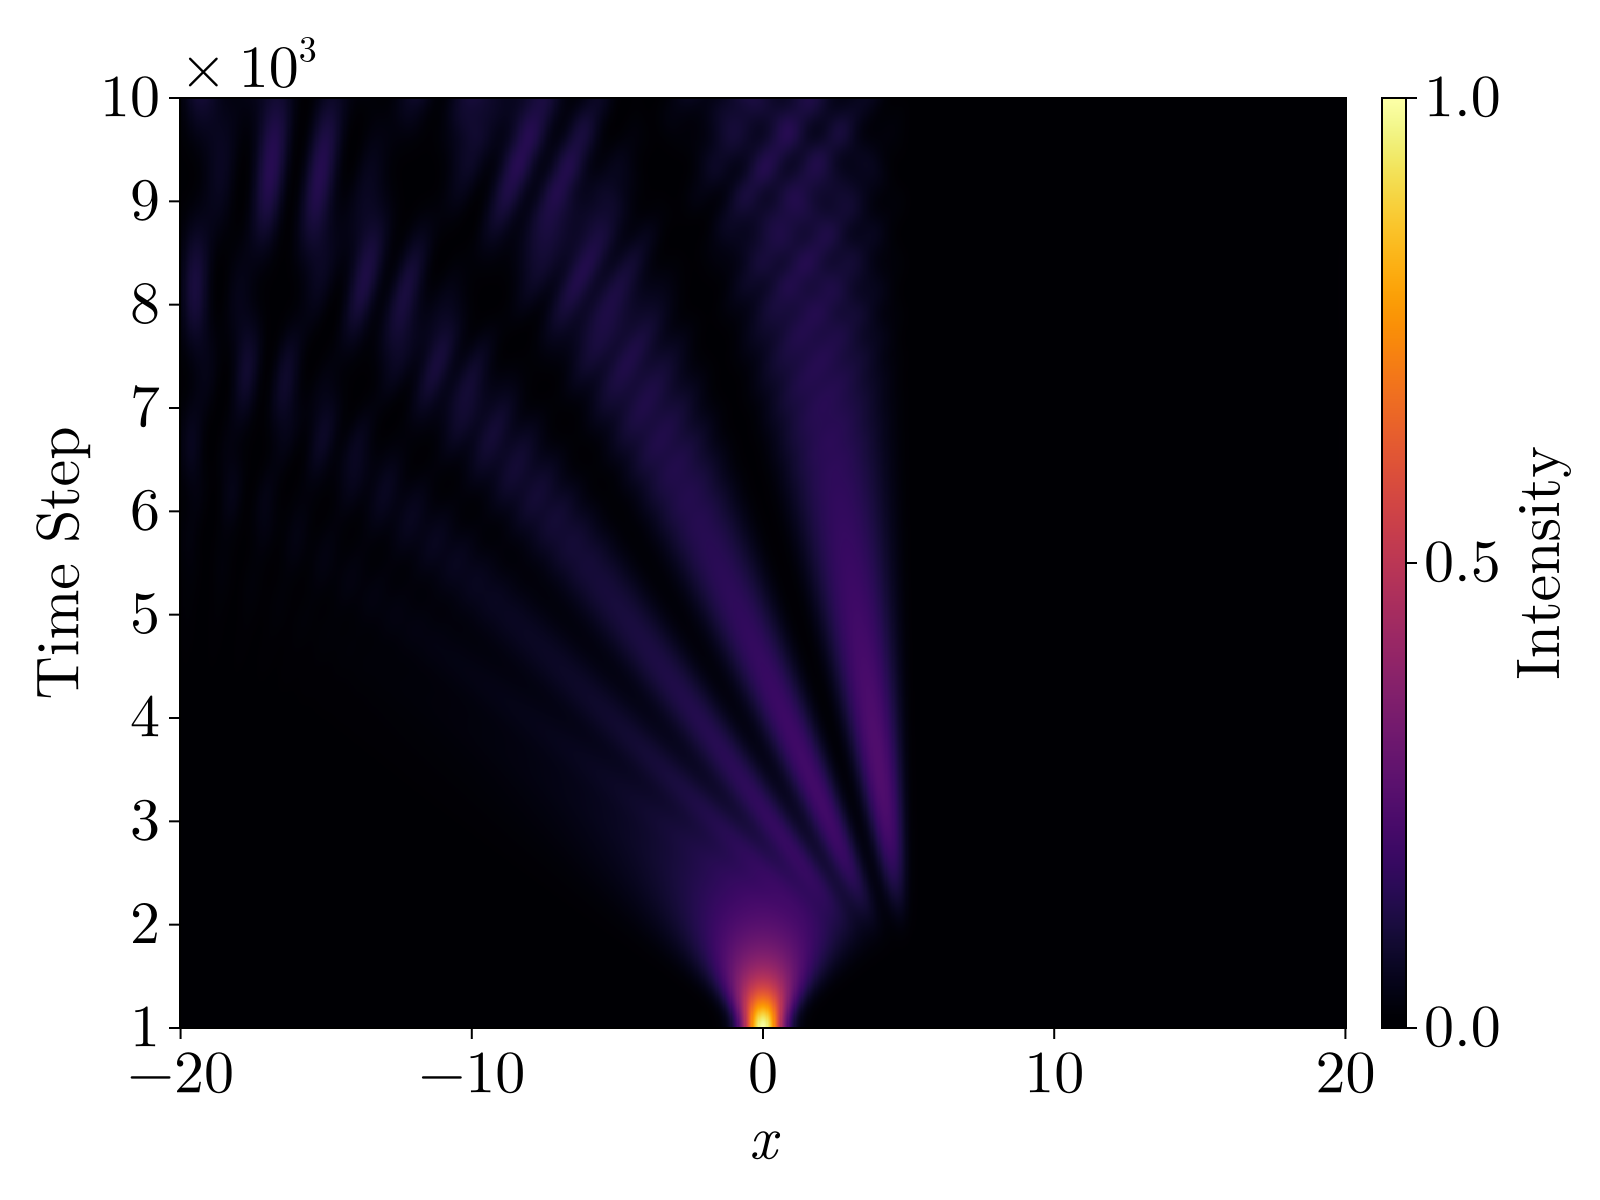

In [59]:
# Plot heatmap of the evolution of |psi|^2 over space and time
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"$x$", ylabel = "Time Step")
y_scaled = 1:M/1000
heatmap!(ax, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
# Add colorbar
Colorbar(fig[1, 2], colormap = :inferno, label = "Intensity")
save("./figs/nlse_heatmap_step.pdf", fig)
fig  # Display the heatmap plot

### Harmonic Potential

In [81]:
psi0 = exp.(-x_grid.^2);  # Initial wave function

V_har = harmonic_potential(x_grid)

psi = psi0 # Time evolution loop
alpha, g, s, V = 2, 1, 1, V_har;  # Fractional order, nonlinearity, saturation, and potential

psi_evo = zeros(ComplexF64, N, M) # Initialize wave function evolution array
for t in 1:M
    psi = time_evolution(psi, alpha, dt, k, g, s, V)
    psi_evo[:, t] = psi
end

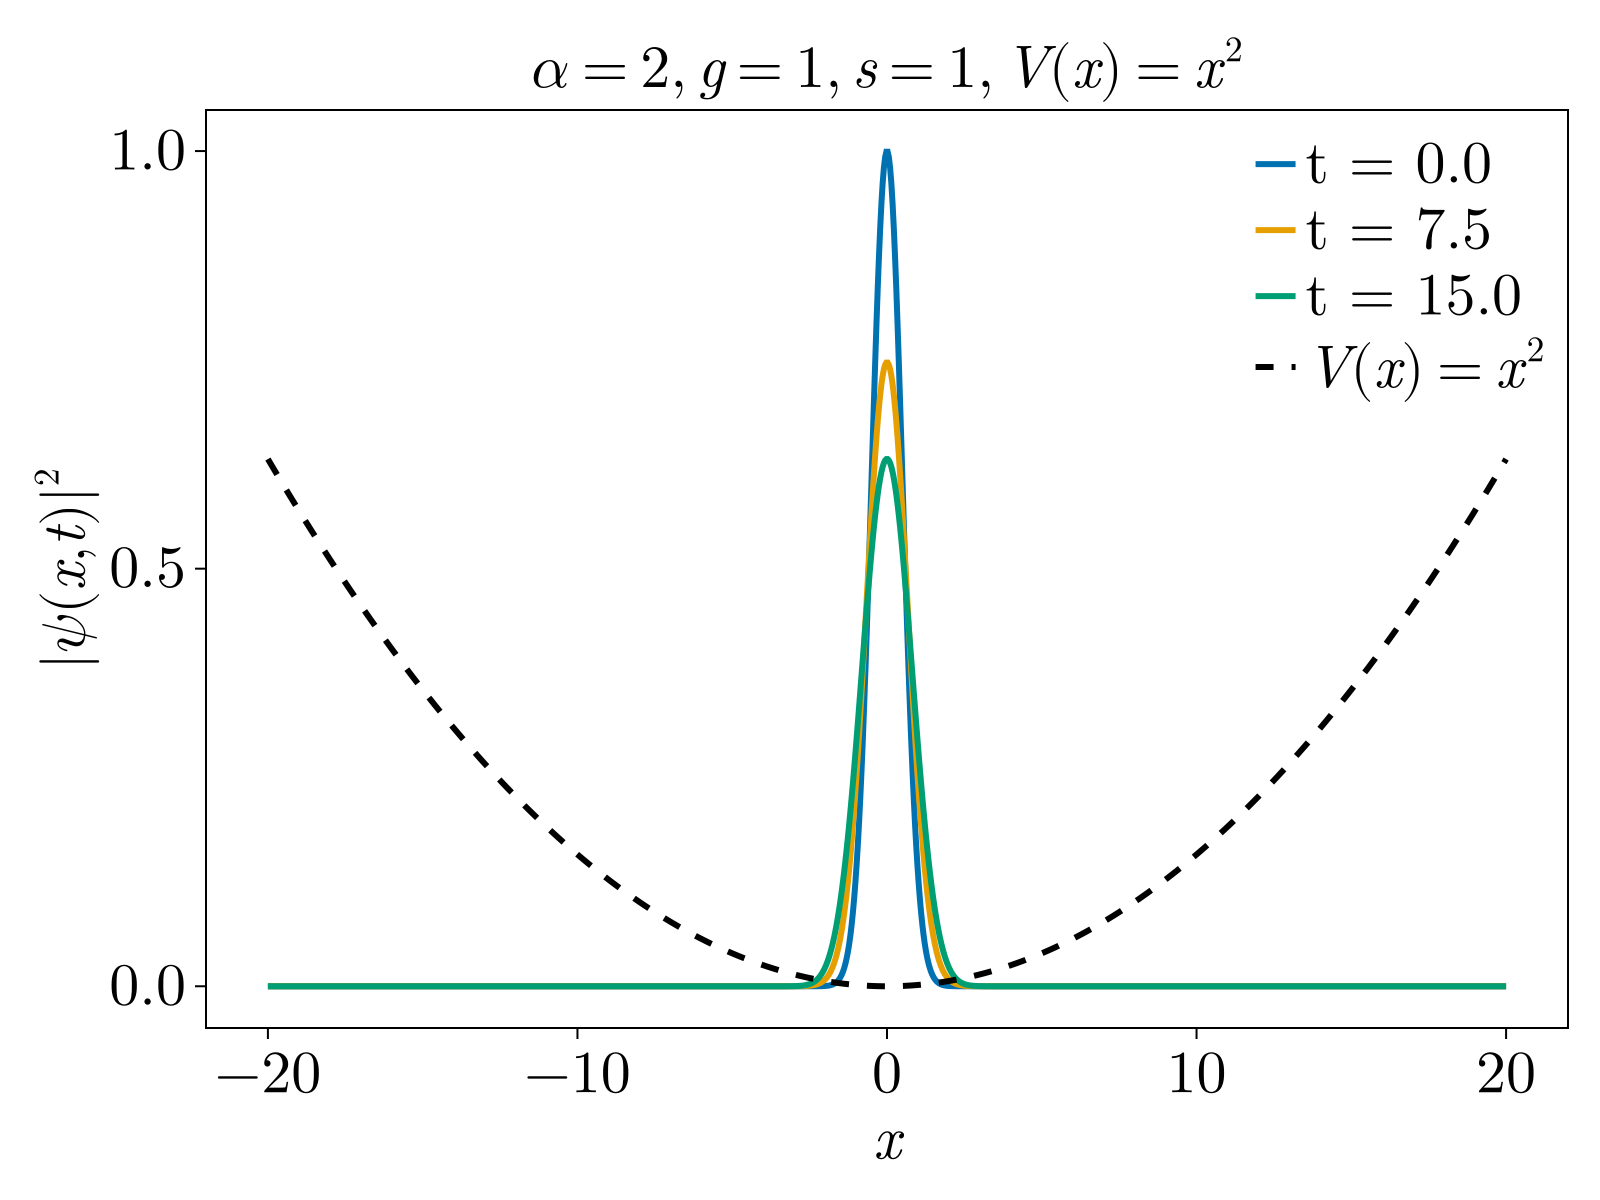

In [82]:
# Calculate |psi|^2
psi_final = real(psi_evo .* conj(psi_evo))

# Select time steps to plot
time_steps_to_plot = [1, Int(M//2), M]

# Plot results
# Set global theme
set_theme!(theme_latexfonts(), size = (800, 600))

fig = Figure(fontsize = 30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", xgridvisible = false, ygridvisible = false,
title = L"\alpha = 2,\, g = 1,\, s = 1,\, V(x) = x^2")
for t in time_steps_to_plot
    lines!(ax, x_grid, psi_final[:, t], label="t = $(round(tfinal * t / M, digits=2))", alpha=1, linewidth=3)
end
# scale harmonic potential according to the maximum value of |psi|^2
V_har = V_har * maximum(psi_final[:, M]) / maximum(V_har)
lines!(ax, x_grid, V_har, label=L"V(x) = x^2", color = :black, linestyle = :dash, linewidth = 3)
axislegend(ax, framevisible = false)
#save("./figs/nlse_evolution_harmonic.pdf", fig)
fig  # Display the plot

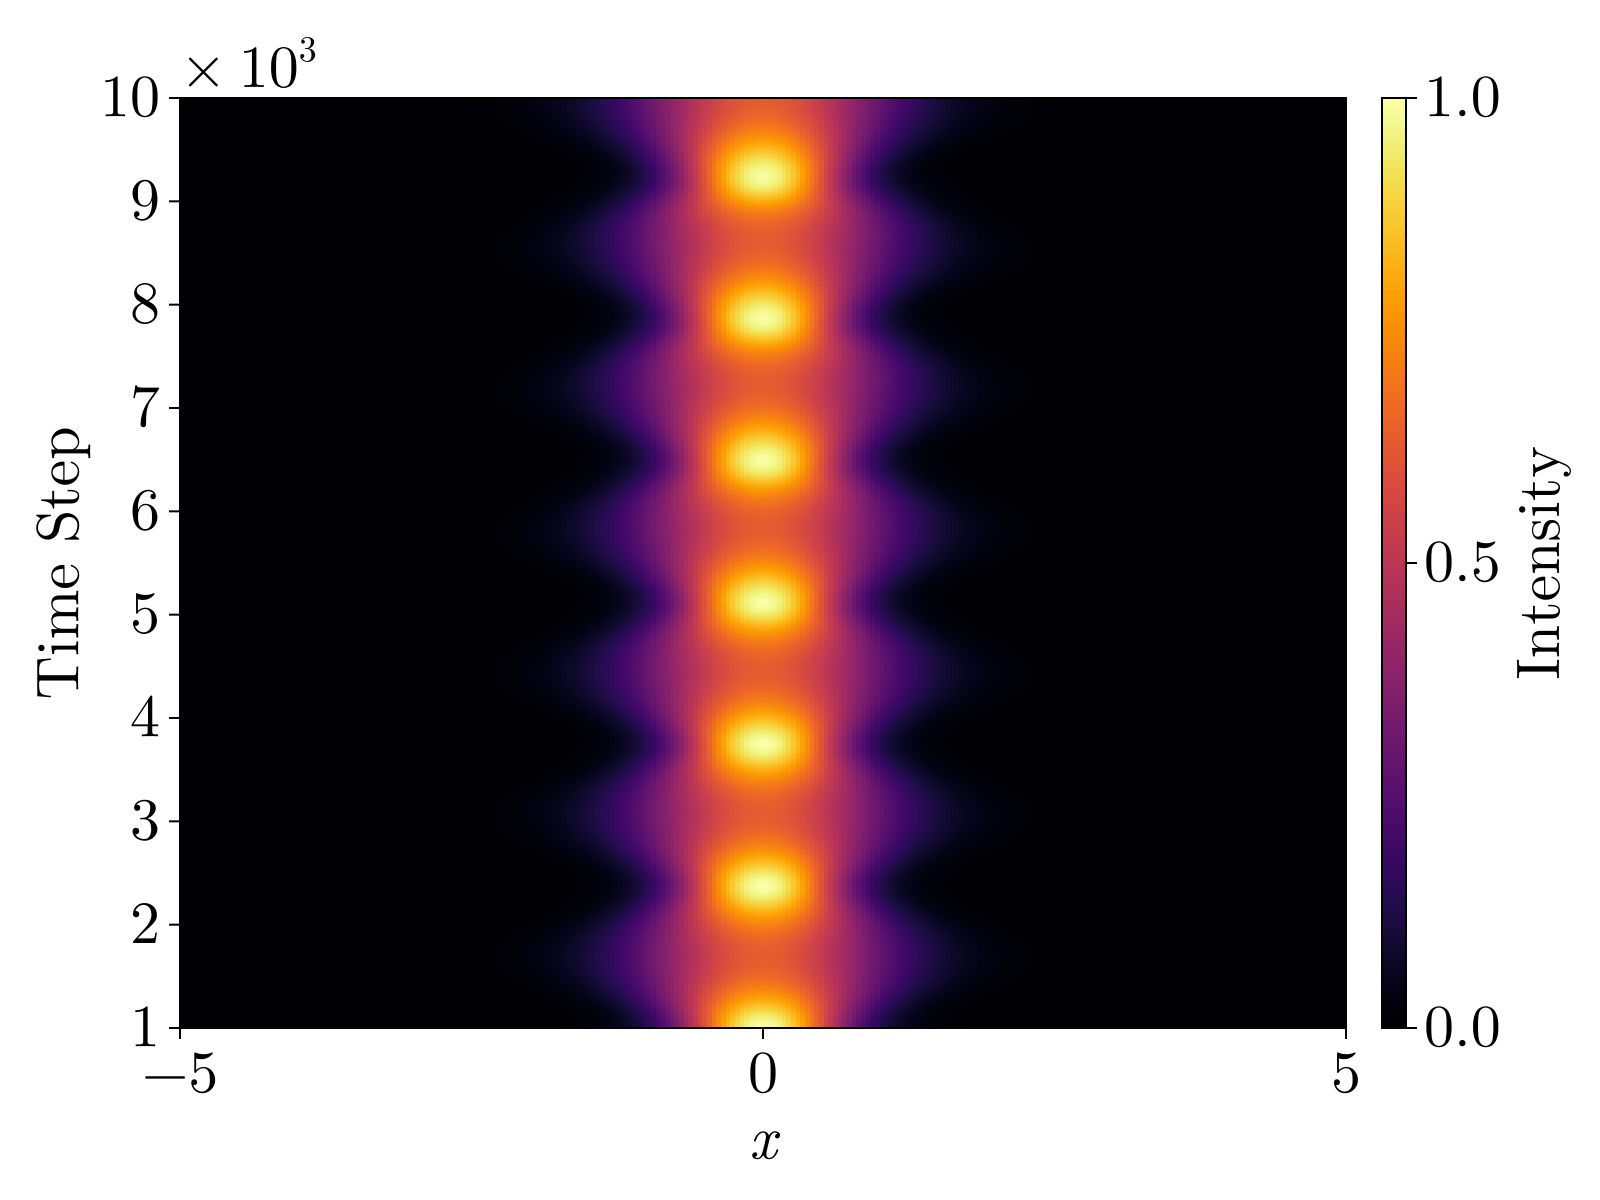

In [80]:
# Plot heatmap of the evolution of |psi|^2 over space and time
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"$x$", ylabel = "Time Step")
y_scaled = 1:M/1000
heatmap!(ax, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
xlims!(ax, -5, 5)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
# Add colorbar
Colorbar(fig[1, 2], colormap = :inferno, label = "Intensity")
#save("./figs/nlse_heatmap_harmonic.pdf", fig)
fig  # Display the heatmap plot